In [3]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score,precision_score, recall_score, f1_score, confusion_matrix
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Dont RUN this. Directly Go to real time testing.

In [17]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_DATA') 

# Actions that we try to detect
actions = np.array(['drink','house','drive','hello','iloveyou','thanks','google','internet','jogging','book'])
#actions = np.array(['hello','iloveyou','thanks','google','internet','pizza','jogging','book'])
#actions = np.array(['hello','book','computer','drink','iloveyou','thanks','before', 'chair', 'go']) ,'before', 'chair', 'go','clothes',''google','internet','pizza','televison','twitter',
 #'clothes','who', 'candy', 'cousin'
# Thirty videos worth of data
no_sequences = 10

# Videos are going to be 30 frames in length
sequence_length = 30



In [3]:
label_map = {label:num for num, label in enumerate(actions)}

In [4]:
label_map

{'drink': 0,
 'house': 1,
 'drive': 2,
 'hello': 3,
 'iloveyou': 4,
 'thanks': 5,
 'google': 6,
 'internet': 7,
 'jogging': 8,
 'book': 9}

In [5]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [6]:
X_test = np.array(sequences)
y_test = to_categorical(labels).astype(int)

In [7]:
""" X_train, X_test, y_train, y_test = train_test_split(X, y)  """

' X_train, X_test, y_train, y_test = train_test_split(X, y)  '

In [7]:
y_test.shape

(100, 10)

In [13]:
model_5 = load_model('LSTM_KNN_DTW_BEST_10words_test3.h5')

In [9]:
yhat = model_5.predict(X_test)

4/4 [==============================] - 2s 32ms/step


In [10]:
model_5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_4 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 596906 (2.28 MB)
Trainable params: 59690

In [11]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [12]:
# Precision
precision = precision_score(ytrue, yhat, average='macro')  # or 'binary' if you have binary classification

# Recall
recall = recall_score(ytrue, yhat, average='macro')  # or 'binary' if you have binary classification

# F1 Score
f1 = f1_score(ytrue, yhat, average='macro')  # or 'binary' if you have binary classification

#accuracy score
accuracy = accuracy_score(ytrue, yhat)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

Precision: 0.9356709956709958
Recall: 0.9199999999999999
F1 Score: 0.9207808290780427
Accuracy: 0.92


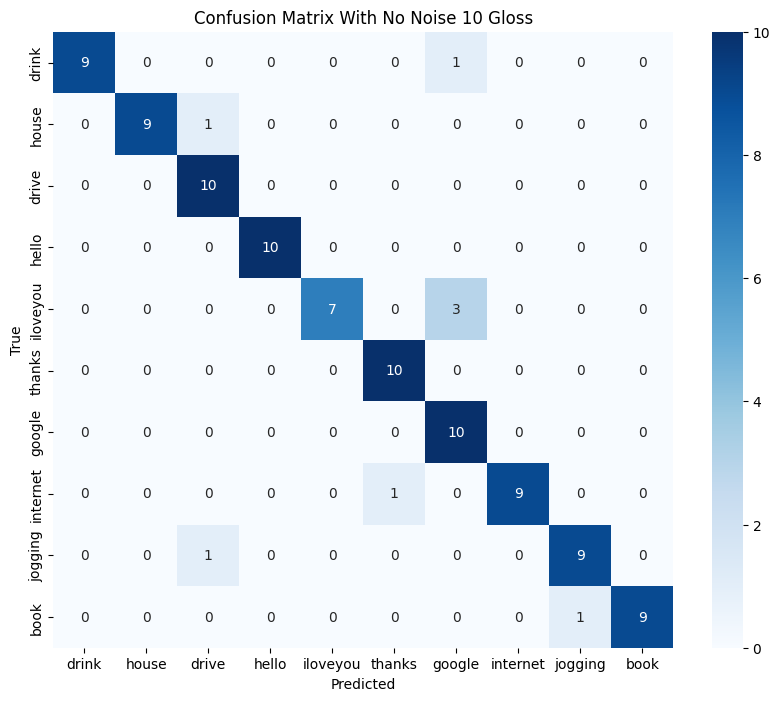

In [13]:
cm = confusion_matrix(ytrue, yhat)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=actions, yticklabels=actions)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix With No Noise 10 Gloss')
plt.show()

# add noise

- sd = 0.01

In [14]:
def add_noise(X, mean=0, std_dev=0.01):
    noise = np.random.normal(mean, std_dev, X.shape)
    return X + noise

In [15]:
# Adding noise to X_test
X_test_noisy = add_noise(X_test, mean=0, std_dev=0.01)

# Making predictions with the noisy X_test
yhat_noisy_probs = model_5.predict(X_test_noisy)
yhat_noisy = np.argmax(yhat_noisy_probs, axis=1)
y_test_labels = np.argmax(y_test, axis=1) if y_test.ndim > 1 else y_test

4/4 [==============================] - 0s 21ms/step


In [16]:
precision = precision_score(y_test_labels, yhat_noisy, average='macro')
recall = recall_score(y_test_labels, yhat_noisy, average='macro')
# F1 Score
f1 = f1_score(ytrue, yhat_noisy, average='macro')  # or 'binary' if you have binary classification

#accuracy score
accuracy = accuracy_score(ytrue, yhat_noisy)

print(f'Precision with noisy data: {precision}')
print(f'Recall with noisy data: {recall}')
print("F1 Score:", f1)
print("Accuracy:", accuracy)

Precision with noisy data: 0.9411655011655012
Recall with noisy data: 0.93
F1 Score: 0.9309399651962582
Accuracy: 0.93


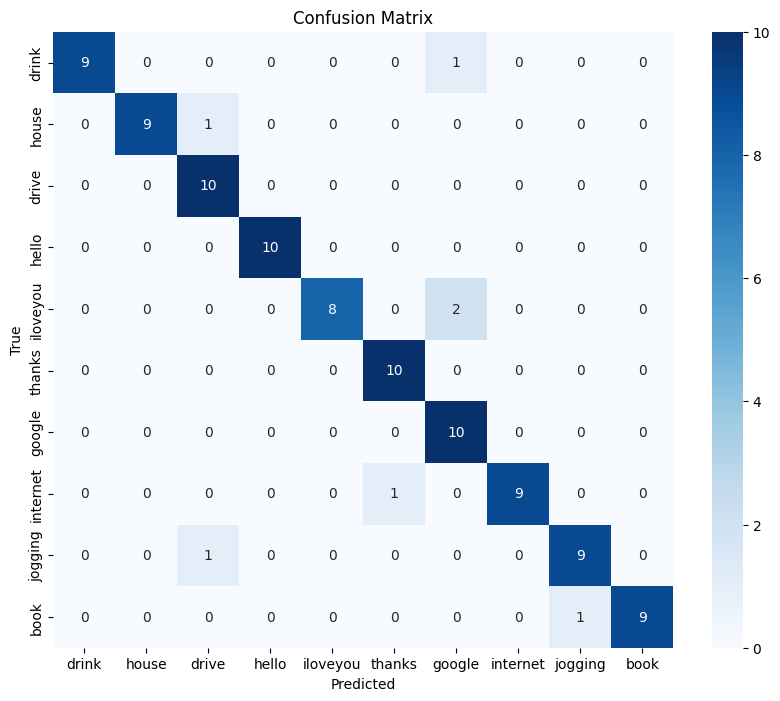

In [17]:
cm = confusion_matrix(ytrue, yhat_noisy)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=actions, yticklabels=actions)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

sd = 0.1

In [18]:
# Adding noise to X_test
X_test_noisy = add_noise(X_test, mean=0, std_dev=0.1)

# Making predictions with the noisy X_test
yhat_noisy_probs = model_5.predict(X_test_noisy)
yhat_noisy = np.argmax(yhat_noisy_probs, axis=1)
y_test_labels = np.argmax(y_test, axis=1) if y_test.ndim > 1 else y_test

4/4 [==============================] - 0s 22ms/step


In [19]:
precision = precision_score(y_test_labels, yhat_noisy, average='macro')
recall = recall_score(y_test_labels, yhat_noisy, average='macro')
# F1 Score
f1 = f1_score(ytrue, yhat_noisy, average='macro')  # or 'binary' if you have binary classification

#accuracy score
accuracy = accuracy_score(ytrue, yhat_noisy)

print(f'Precision with noisy data: {precision}')
print(f'Recall with noisy data: {recall}')
print("F1 Score:", f1)
print("Accuracy:", accuracy)

Precision with noisy data: 0.9220745920745921
Recall with noisy data: 0.9099999999999999
F1 Score: 0.9108313603508111
Accuracy: 0.91


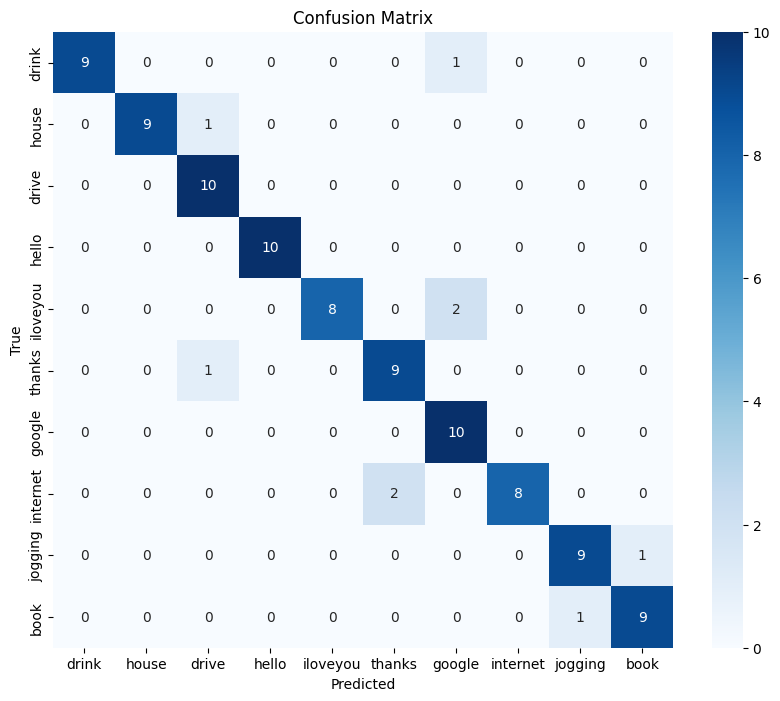

In [20]:
cm = confusion_matrix(ytrue, yhat_noisy)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=actions, yticklabels=actions)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [21]:
#sd = 1
# Adding noise to X_test
X_test_noisy = add_noise(X_test, mean=0, std_dev= 1)

# Making predictions with the noisy X_test
yhat_noisy_probs = model_5.predict(X_test_noisy)
yhat_noisy = np.argmax(yhat_noisy_probs, axis=1)
y_test_labels = np.argmax(y_test, axis=1) if y_test.ndim > 1 else y_test

4/4 [==============================] - 0s 21ms/step


In [22]:
precision = precision_score(y_test_labels, yhat_noisy, average='macro')
recall = recall_score(y_test_labels, yhat_noisy, average='macro')
# F1 Score
f1 = f1_score(ytrue, yhat_noisy, average='macro')  # or 'binary' if you have binary classification

#accuracy score
accuracy = accuracy_score(ytrue, yhat_noisy)

print(f'Precision with noisy data: {precision}')
print(f'Recall with noisy data: {recall}')
print("F1 Score:", f1)
print("Accuracy:", accuracy)

Precision with noisy data: 0.21484962406015037
Recall with noisy data: 0.31000000000000005
F1 Score: 0.23751329080276448
Accuracy: 0.31


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


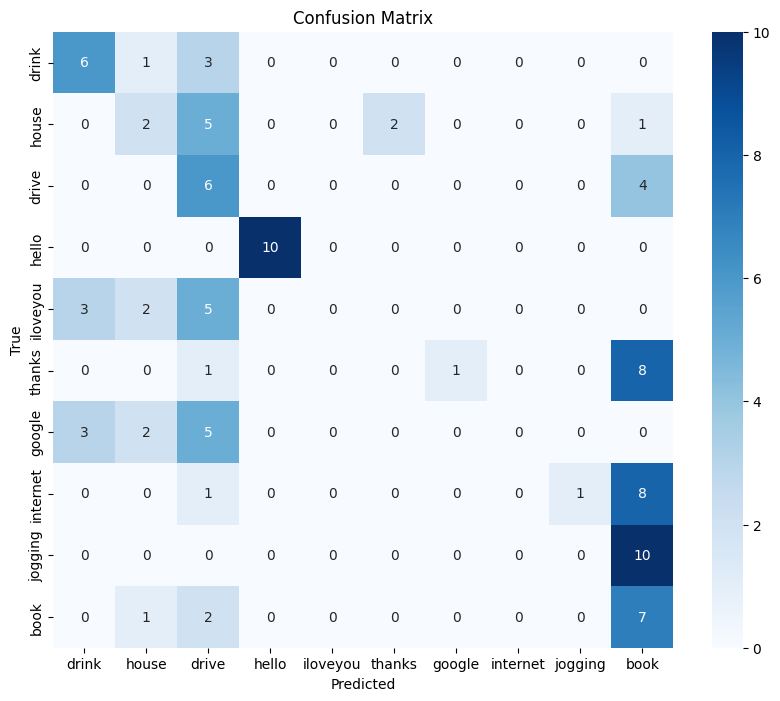

In [23]:
cm = confusion_matrix(ytrue, yhat_noisy)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=actions, yticklabels=actions)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

4/4 [==============================] - 0s 18ms/step
Noise SD=0.01 -> Precision: 0.9356709956709958, Recall: 0.9199999999999999, F1 Score: 0.9207808290780427, Accuracy: 0.92
4/4 [==============================] - 0s 17ms/step
Noise SD=0.05 -> Precision: 0.935064935064935, Recall: 0.9199999999999999, F1 Score: 0.9208241191213327, Accuracy: 0.92
4/4 [==============================] - 0s 18ms/step
Noise SD=0.1 -> Precision: 0.9220745920745921, Recall: 0.9099999999999999, F1 Score: 0.9108313603508111, Accuracy: 0.91
4/4 [==============================] - 0s 21ms/step
Noise SD=0.15 -> Precision: 0.8804079254079256, Recall: 0.8700000000000001, F1 Score: 0.8707462992131185, Accuracy: 0.87
4/4 [==============================] - 0s 18ms/step
Noise SD=0.2 -> Precision: 0.8221719457013574, Recall: 0.8, F1 Score: 0.7981638467050367, Accuracy: 0.8
4/4 [==============================] - 0s 22ms/step
Noise SD=0.25 -> Precision: 0.7269255744255745, Recall: 0.74, F1 Score: 0.7096194744106643, Accuracy: 

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 0s 17ms/step
Noise SD=0.7 -> Precision: 0.4423128618693134, Recall: 0.41999999999999993, F1 Score: 0.36353598975550194, Accuracy: 0.42


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 0s 19ms/step
Noise SD=0.8 -> Precision: 0.5136500754147814, Recall: 0.39, F1 Score: 0.33001263172887885, Accuracy: 0.39


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 0s 19ms/step
Noise SD=0.9 -> Precision: 0.19266955266955268, Recall: 0.29, F1 Score: 0.21831871345029236, Accuracy: 0.29


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 0s 34ms/step
Noise SD=1 -> Precision: 0.24021645021645024, Recall: 0.31999999999999995, F1 Score: 0.2459413740074695, Accuracy: 0.32


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


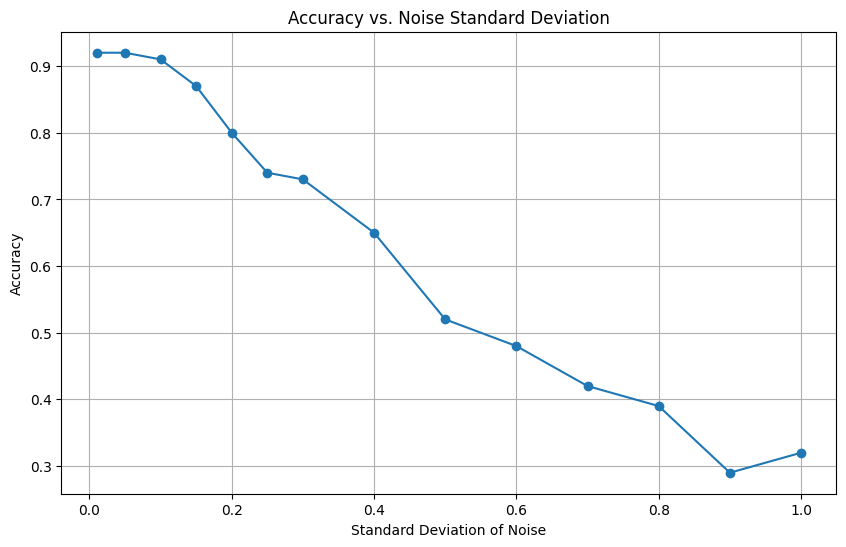

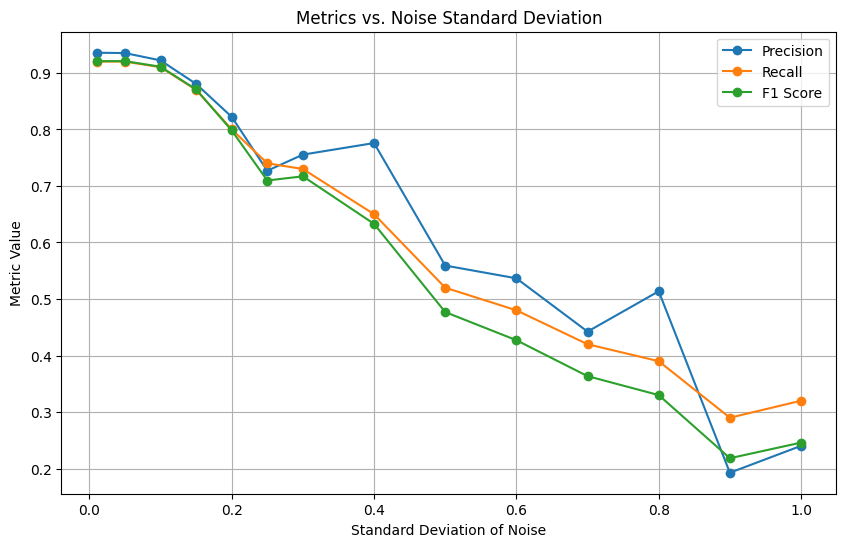

In [24]:
# Noise standard deviations to test
noise_std_devs = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]


# Lists to store results
precisions, recalls, f1_scores, accuracies = [], [], [], []

for std_dev in noise_std_devs:
    # Add noise to the test data
    X_test_noisy = add_noise(X_test, mean=0, std_dev=std_dev)

    # Predict with the noisy data
    yhat_noisy_probs = model_5.predict(X_test_noisy)
    yhat_noisy = np.argmax(yhat_noisy_probs, axis=1)
    y_test_labels = np.argmax(y_test, axis=1) if y_test.ndim > 1 else y_test

    # Calculate metrics
    precision = precision_score(y_test_labels, yhat_noisy, average='macro')
    recall = recall_score(y_test_labels, yhat_noisy, average='macro')
    f1 = f1_score(y_test_labels, yhat_noisy, average='macro')
    accuracy = accuracy_score(y_test_labels, yhat_noisy)

    # Append results to lists
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    accuracies.append(accuracy)

    print(f'Noise SD={std_dev} -> Precision: {precision}, Recall: {recall}, F1 Score: {f1}, Accuracy: {accuracy}')

# Plot the accuracy against the standard deviations
plt.figure(figsize=(10, 6))
plt.plot(noise_std_devs, accuracies, marker='o')
plt.title('Accuracy vs. Noise Standard Deviation')
plt.xlabel('Standard Deviation of Noise')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Optionally, you can also plot precision, recall, and F1 score similarly
plt.figure(figsize=(10, 6))
plt.plot(noise_std_devs, precisions, marker='o', label='Precision')
plt.plot(noise_std_devs, recalls, marker='o', label='Recall')
plt.plot(noise_std_devs, f1_scores, marker='o', label='F1 Score')
plt.title('Metrics vs. Noise Standard Deviation')
plt.xlabel('Standard Deviation of Noise')
plt.ylabel('Metric Value')
plt.grid(True)
plt.legend()
plt.show()

In [25]:
dtw_noise_levels = [0.0, 0.01, 0.05, 0.1, 0.5, 1]
dtw_knn_accuracy = [74, 72, 72, 71,54, 34]

4/4 [==============================] - 0s 18ms/step
Noise SD=0.01 -> Precision: 0.9356709956709958, Recall: 0.9199999999999999, F1 Score: 0.9207808290780427, Accuracy: 0.92
4/4 [==============================] - 0s 15ms/step
Noise SD=0.05 -> Precision: 0.9387412587412587, Recall: 0.93, F1 Score: 0.9305321274199994, Accuracy: 0.93
4/4 [==============================] - 0s 19ms/step
Noise SD=0.1 -> Precision: 0.9164285714285715, Recall: 0.9, F1 Score: 0.9017149826437754, Accuracy: 0.9
4/4 [==============================] - 0s 16ms/step
Noise SD=0.15 -> Precision: 0.8704872904872906, Recall: 0.86, F1 Score: 0.8561279797960376, Accuracy: 0.86
4/4 [==============================] - 0s 18ms/step
Noise SD=0.2 -> Precision: 0.8515601503759399, Recall: 0.8100000000000002, F1 Score: 0.8041946774860195, Accuracy: 0.81
4/4 [==============================] - 0s 18ms/step
Noise SD=0.25 -> Precision: 0.8352904040404041, Recall: 0.77, F1 Score: 0.7582392753445385, Accuracy: 0.77
4/4 [=================

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 0s 18ms/step
Noise SD=0.7 -> Precision: 0.592781954887218, Recall: 0.45000000000000007, F1 Score: 0.4045280128220237, Accuracy: 0.45
4/4 [==============================] - 0s 18ms/step
Noise SD=0.8 -> Precision: 0.2765597147950089, Recall: 0.36000000000000004, F1 Score: 0.28045704295704293, Accuracy: 0.36


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 0s 19ms/step
Noise SD=0.9 -> Precision: 0.41498796791443854, Recall: 0.36000000000000004, F1 Score: 0.2979935853620064, Accuracy: 0.36


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 0s 20ms/step
Noise SD=1 -> Precision: 0.5172899159663865, Recall: 0.31, F1 Score: 0.2798854087089381, Accuracy: 0.31


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


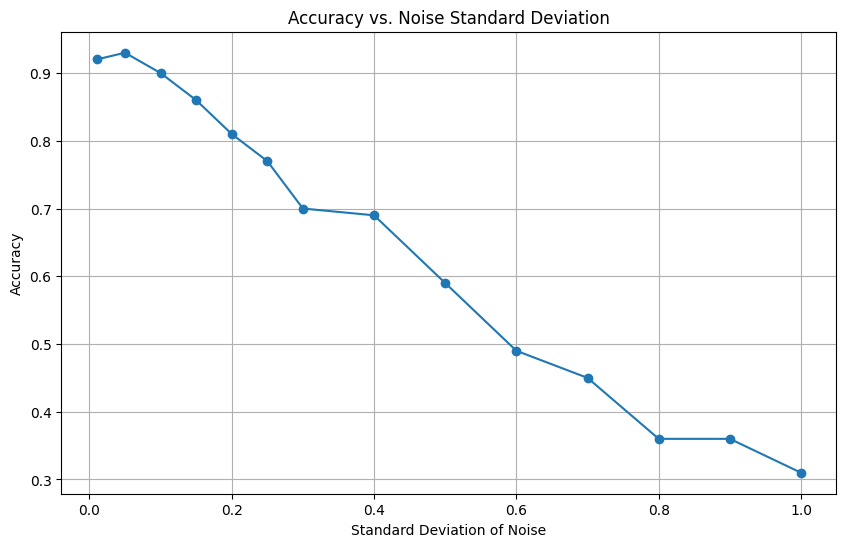

In [27]:
# Noise standard deviations to test
noise_std_devs = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]


# Lists to store results
precisions, recalls, f1_scores, accuracies = [], [], [], []

for std_dev in noise_std_devs:
    # Add noise to the test data
    X_test_noisy = add_noise(X_test, mean=0, std_dev=std_dev)

    # Predict with the noisy data
    yhat_noisy_probs = model_5.predict(X_test_noisy)
    yhat_noisy = np.argmax(yhat_noisy_probs, axis=1)
    y_test_labels = np.argmax(y_test, axis=1) if y_test.ndim > 1 else y_test

    # Calculate metrics
    precision = precision_score(y_test_labels, yhat_noisy, average='macro')
    recall = recall_score(y_test_labels, yhat_noisy, average='macro')
    f1 = f1_score(y_test_labels, yhat_noisy, average='macro')
    accuracy = accuracy_score(y_test_labels, yhat_noisy)

    # Append results to lists
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    accuracies.append(accuracy)

    print(f'Noise SD={std_dev} -> Precision: {precision}, Recall: {recall}, F1 Score: {f1}, Accuracy: {accuracy}')

# Plot the accuracy against the standard deviations
plt.figure(figsize=(10, 6))
plt.plot(noise_std_devs, accuracies, marker='o')
plt.title('Accuracy vs. Noise Standard Deviation')
plt.xlabel('Standard Deviation of Noise')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Test real world

In [ ]:
model_5 = load_model('LSTM_KNN_DTW_BEST_10words_test3.h5')

In [4]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [30]:
!pip install pyttsx3


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
#for speech
import pyttsx3
speech_engine = pyttsx3.init()
# Adjust the speech rate
rate = speech_engine.getProperty('rate')   # Get current speech rate
speech_engine.setProperty('rate', rate-50) # Reduce the rate by 50

# Optionally adjust the volume
volume = speech_engine.getProperty('volume')  # Get current volume
speech_engine.setProperty('volume', volume+0.3)

voices = speech_engine.getProperty('voices')
for voice in voices:
    if 'en-us' in voice.id:  # Look for a specific voice characteristic, if necessary
        speech_engine.setProperty('voice', voice.id)
        break

Please run Action and Model.

In [18]:
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0) # Assuming '1' is correct for your camera setup
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            print("Failed to grab frame")
            break

        image, results = mediapipe_detection(frame, holistic)
        draw_styled_landmarks(image, results)

        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]

        if len(sequence) == 30:
            res = model_5.predict(np.expand_dims(sequence, axis=0))[0]
            predictions.append(np.argmax(res))

            if np.unique(predictions[-10:])[0] == np.argmax(res) and res[np.argmax(res)] > threshold:
                if len(sentence) == 0 or actions[np.argmax(res)] != sentence[-1]:
                    sentence.append(actions[np.argmax(res)])
                    
                    speech_engine.say(actions[np.argmax(res)])
                    speech_engine.runAndWait()
                sentence = sentence[-5:]

                # Enhanced UI logic for translation display
                cv2.rectangle(image, (0, 0), (640, 100), (0, 0, 0), -1)  # Larger rectangle for better visibility
                cv2.putText(image, 'Translating Gesture: ' + ' '.join(sentence), (3, 60), 
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
                

        cv2.imshow('Gesture Translator', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 53ms/step


In [16]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.7) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            print("Failed to grab frame")
            break

        image, results = mediapipe_detection(frame, holistic)
        draw_styled_landmarks(image, results)

        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]

        if len(sequence) == 30:
            res = model_5.predict(np.expand_dims(sequence, axis=0))[0]
            predictions.append(np.argmax(res))

            if np.unique(predictions[-10:])[0] == np.argmax(res) and res[np.argmax(res)] > threshold:
                if len(sentence) == 0 or actions[np.argmax(res)] != sentence[-1]:
                    sentence.append(actions[np.argmax(res)])
                    
                    speech_engine.say(actions[np.argmax(res)])
                    speech_engine.runAndWait()
                sentence = sentence[-5:]

        # Create a black image for the left side
        left_panel = np.zeros((frame.shape[0], 300, 3), dtype=np.uint8)

        # Display the latest prediction on the left panel
        if sentence:
            cv2.putText(left_panel, 'Current Gesture:', (10, 40), 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
            cv2.putText(left_panel, sentence[-1], (10, 80), 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

        # Combine the left panel and the image frame
        combined_image = np.hstack((left_panel, image))

        cv2.imshow('Gesture Translator', combined_image)
cv2.destroyAllWindows()

1/1 [==============================] - 0s 36ms/step


NameError: name 'actions' is not defined

In [15]:
cv2.destroyAllWindows()

In [11]:
sequence = []
sentence = []
predictions = []
threshold = 0.7

cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.7) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            print("Failed to grab frame")
            break

        image, results = mediapipe_detection(frame, holistic)
        draw_styled_landmarks(image, results)

        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predictions.append(np.argmax(res))

            if np.unique(predictions[-10:])[0] == np.argmax(res) and res[np.argmax(res)] > threshold:
                if len(sentence) == 0 or actions[np.argmax(res)] != sentence[-1]:
                    sentence.append(actions[np.argmax(res)])
                    
                    speech_engine.say(actions[np.argmax(res)])
                    speech_engine.runAndWait()
                sentence = sentence[-5:]

                # Enhanced UI logic for translation display
                cv2.rectangle(image, (0, 0), (640, 150), (0, 0, 0), -1)  # Larger rectangle for better visibility
                cv2.putText(image, 'Gesture Translator', (10, 40), 
                            cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 255, 0), 2, cv2.LINE_AA)
                cv2.putText(image, 'Translating Gesture: ' + ' '.join(sentence), (10, 100), 
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        cv2.imshow('Gesture Translator', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

NameError: name 'model' is not defined